In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
try:
#   %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [ ]:
# !pip install hypopt

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
 
# Importing sklearn libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
 
# Importing hypopt library for grid search
from hypopt import GridSearch
 
# Importing Keras libraries
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from keras import backend as K

#Importing libraries

import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from sklearn.metrics import confusion_matrix
import os
%matplotlib inline
 
import warnings
warnings.filterwarnings('ignore')

Instructions for updating:
non-resource variables are not supported in the long term


ModuleNotFoundError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
# root_dir = "/content/gdrive/My Drive/"
root_dir = "/"

Mounted at /content/gdrive


In [ ]:
cd LifelogData 

/home/jupyter/LifelogData


In [ ]:
train_dir = os.path.join('Final 10 cat/train')
Validation_dir = os.path.join('Final 10 cat/val')
test_dir = os.path.join('Final 10 cat/test')

# #Creating Category Labels

# from glob import glob
#folders = glob('/content/gdrive/My Drive/Lifelog_Dataset/new_Train')
#print(folders)
train_labels = []
New_train_img_arrayabels = []
Validation_labels = []
Test_labels = []

In [ ]:
# PATH = os.path.join(root_dir, '/content/gdrive/My Drive/Lifelog_Dataset')

In [ ]:
train_dir = os.path.join('final_10cat/train')
Validation_dir = os.path.join('final_10cat/val')
test_dir = os.path.join('final_10cat/test')

# #Creating Category Labels

# from glob import glob
#folders = glob('/content/gdrive/My Drive/Lifelog_Dataset/new_Train')
#print(folders)
train_labels = []
New_train_img_arrayabels = []
Validation_labels = []
Test_labels = []

In [ ]:
# Show pictures
import os, random
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

def show_pictures(path,name):
    for x in name : 
        z = os.path.join(path +'/' + x)
        random_img = random.choice(os.listdir(z))
        img_path = os.path.join(z, random_img)

        img = image.load_img(img_path, target_size=(224, 224))
        img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
        img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
        plt.imshow(img_tensor)
        print(x)
        plt.show()

In [ ]:
# for i in range(0,1):
#     show_pictures(train)

# for x in train :
#     show_imgs(train)
# #     print(x)
img_height = 224
img_width = 224
batch_size = 16

In [ ]:

train_batches = ImageDataGenerator().flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="sparse",
    batch_size=16,
    shuffle=False
)



test_batches = ImageDataGenerator().flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="sparse",
    batch_size=16,
    shuffle=False
)

valid_batches = ImageDataGenerator().flow_from_directory(
    Validation_dir,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="sparse",
    batch_size=16,
    shuffle=False
)
 
batch_size = 16
img_height = 224
img_width = 224


Found 11713 images belonging to 10 classes.
Found 3912 images belonging to 10 classes.
Found 3902 images belonging to 10 classes.


In [ ]:
len(train_batches)

733

In [ ]:
len(test_batches)

245

In [ ]:
len(valid_batches)

244

In [ ]:
img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 10

# Fine tuning Approch 3- Removing classifier layers and putting some new layers

In [ ]:
# checkpoint_path = "training/cpres_1.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# Save the weights using the `checkpoint_path` format
VGG19_model3.save_weights(checkpoint_path.format(epoch=0))

In [ ]:
VGG19_model3 = VGG19(input_tensor = Input(shape=(img_rows, img_cols, channel)),include_top=False, weights='imagenet')

In [ ]:
VGG19_model3.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
last_layer = VGG19_model3.output
last_layer2 = Dense(128, activation='sigmoid')(last_layer)
last_layer3 = GlobalAveragePooling2D()(last_layer2)
last_layer4 = Dropout(0.1)(last_layer3)
predictions = Dense(10, activation='softmax')(last_layer4)

In [ ]:
flat1 = Flatten()(VGG19_model3.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)

In [ ]:
VGG19_model3 = Model(inputs=VGG19_model3.input, outputs=output)
#VGG16_model3.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.SGD(lr=0.001, momentum=0.9),metrics=["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),get_f1])

In [ ]:
VGG19_model3 = Model(inputs=VGG19_model3.input, outputs=predictions)
#VGG16_model3.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.SGD(lr=0.001, momentum=0.9),metrics=["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),get_f1])

In [ ]:
VGG19_model3.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
VGG19_model3.save_weights(checkpoint_path.format(epoch=0))

# 10 epochs result for VGG19

In [ ]:
#10 final last with relu

In [ ]:
VGG19_model3.compile(loss='sparse_categorical_crossentropy',optimizer= SGD(lr=0.0001),metrics=['sparse_categorical_accuracy'])
history = VGG19_model3.fit(
  train_batches,
  validation_data = (valid_batches),
  epochs=10,
  callbacks=[cp_callback],
  validation_steps=len(valid_batches),
  verbose = 1,
  shuffle=True,
  )

Epoch 1/10
733/733 [==============================] - 260s 355ms/step - batch: 366.0000 - size: 15.9795 - loss: 1.7136 - sparse_categorical_accuracy: 0.5212 - val_loss: 1.0468 - val_sparse_categorical_accuracy: 0.6666
Epoch 2/10
733/733 [==============================] - 261s 356ms/step - batch: 366.0000 - size: 15.9795 - loss: 0.9194 - sparse_categorical_accuracy: 0.7129 - val_loss: 0.8786 - val_sparse_categorical_accuracy: 0.7235
Epoch 3/10
733/733 [==============================] - 261s 357ms/step - batch: 366.0000 - size: 15.9795 - loss: 0.7357 - sparse_categorical_accuracy: 0.7726 - val_loss: 0.7927 - val_sparse_categorical_accuracy: 0.7558
Epoch 4/10
733/733 [==============================] - 261s 357ms/step - batch: 366.0000 - size: 15.9795 - loss: 0.6117 - sparse_categorical_accuracy: 0.8047 - val_loss: 0.7533 - val_sparse_categorical_accuracy: 0.7622
Epoch 5/10
733/733 [==============================] - ETA: 0s - batch: 366.0000 - size: 15.9795 - loss: 0.5088 - sparse_categori

In [ ]:
#np.save("Results/10_l/history.npy",history.history)
history=np.load('/content/gdrive/My Drive/m1_20/m2/m3/his/history.npy',allow_pickle='TRUE').item()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


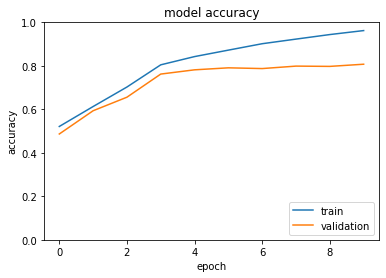

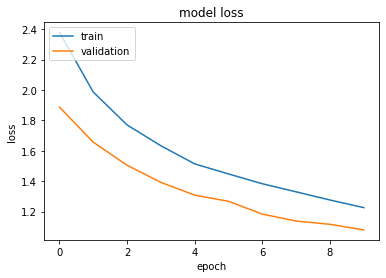

In [ ]:
# list all data in history
print(history.keys())
# summarize history for accuracy
plt.ylim([0,1])
plt.plot(history['sparse_categorical_accuracy'])
plt.plot(history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [ ]:
VGG19_model3.save_weights("Results/10_l/VGG19_model3.h5")
test_batches.reset() #Necessary to force it to start from beginning
Y_pred_10_vgg19_app3 = VGG19_model3.predict_generator(test_batches)
y_pred_10_vgg19_app3 = np.argmax(Y_pred_10_vgg19_app3, axis=-1)
#sum(y_pred==test_batches.classes)/10000

In [ ]:
np.save("Results/10_l/y_pred_20_vgg19_app3.npy",y_pred_10_vgg19_app3)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_batches.classes,y_pred_10_vgg19_app3)

array([[126,   3,  24,   1,  12,   0,   2,  50,   0,  18],
       [  3, 417,   0,   2,   3,   0,   2,   9,   0,   1],
       [ 14,   2, 116,   0,   6,   2,   5,  17,   5,   4],
       [  1,   1,   0, 188,   9,   0,   4,   4,   0,   0],
       [  2,   0,   3,   2, 556,   3,  14,  28,   2,   1],
       [  1,   2,   4,   0,   7, 333,  31,   9,   0,   1],
       [  6,   0,   6,   5,  40,  43, 751,  23,   0,  14],
       [ 22,  11,  12,   4,  39,   9,  20, 353,   1,  23],
       [  0,   0,   2,   0,   6,   1,   2,   3, 162,   1],
       [ 13,   0,   6,   0,  13,   0,  24,  73,   0, 174]])

In [ ]:
def saving_plotting_results(prediction,model_name):
 # from sklearn.metrics import confusion_matrix
  #test_imgs,test_labels = next(test_batches)
  #cm = confusion_matrix(test_labels,prediction)
  #print(cm)
  from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix,log_loss
  from prettytable import PrettyTable
  from sklearn.metrics import f1_score
  print("\n"+model_name+"Scores:")
  t = PrettyTable(['Accuracy','Precision','Recall','F1 Score'])
  t.add_row(["{:.2%}".format(accuracy_score(test_batches.classes, prediction)),"{:.2%}".format(precision_score(test_batches.classes, prediction, average='macro')),"{:.2%}".format(recall_score(test_batches.classes, prediction, average='macro')),"{:.2%}".format(f1_score(test_batches.classes, prediction, average='macro'))])
  print(t)  
  tf.debugging.set_log_device_placement(True)

# Place tensors on the GPU
with tf.device('/GPU:0'):
    saving_plotting_results(y_pred_10_vgg19_app3,"VGG19")


VGG19Scores:
+----------+-----------+--------+----------+
| Accuracy | Precision | Recall | F1 Score |
+----------+-----------+--------+----------+
|  81.19%  |   80.70%  | 78.93% |  79.56%  |
+----------+-----------+--------+----------+
